# Notebook for plotting magnetic property measurement system data for anorthosite and diabase

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

### Make MPMS plot

In [9]:
def get_MPMS_data(excel_sheet, start_column_number):
    FC_T = excel_sheet.iloc[:,start_column_number][2:].tolist()
    FC_M = excel_sheet.iloc[:,start_column_number+2][2:].tolist()
    FC_reg = excel_sheet.iloc[:,start_column_number+3][2:].tolist()
    
    ZFC_T = excel_sheet.iloc[:,start_column_number+6][2:].tolist()
    ZFC_M = excel_sheet.iloc[:,start_column_number+8][2:].tolist()
    ZFC_reg = excel_sheet.iloc[:,start_column_number+9][2:].tolist()
    
    RT_cool_T = excel_sheet.iloc[:,start_column_number+12][2:].tolist()
    RT_cool_M = excel_sheet.iloc[:,start_column_number+14][2:].tolist()
    RT_cool_reg = excel_sheet.iloc[:,start_column_number+15][2:].tolist()
    
    RT_warm_T = excel_sheet.iloc[:,start_column_number+18][2:].tolist()
    RT_warm_M = excel_sheet.iloc[:,start_column_number+20][2:].tolist()
    RT_warm_reg = excel_sheet.iloc[:,start_column_number+21][2:].tolist()
    
    FC_T = [FC_T[i] for i in range(len(FC_T)) if str(FC_T[i]) != 'nan' and FC_reg[i]>0.9]
    FC_M = [FC_M[i] for i in range(len(FC_M)) if str(FC_M[i]) != 'nan' and FC_reg[i]>0.9]
    ZFC_T = [ZFC_T[i] for i in range(len(ZFC_T)) if str(ZFC_T[i]) != 'nan' and ZFC_reg[i]>0.9]
    ZFC_M = [ZFC_M[i] for i in range(len(ZFC_M)) if str(ZFC_M[i]) != 'nan' and ZFC_reg[i]>0.9]
    RT_cool_T = [RT_cool_T[i] for i in range(len(RT_cool_T)) if str(RT_cool_T[i]) != 'nan' and RT_cool_reg[i]>0.9]
    RT_cool_M = [RT_cool_M[i] for i in range(len(RT_cool_M)) if str(RT_cool_M[i]) != 'nan' and RT_cool_reg[i]>0.9]
    RT_warm_T = [RT_warm_T[i] for i in range(len(RT_warm_T)) if str(RT_warm_T[i]) != 'nan' and RT_warm_reg[i]>0.9]
    RT_warm_M = [RT_warm_M[i] for i in range(len(RT_warm_M)) if str(RT_warm_M[i]) != 'nan' and RT_warm_reg[i]>0.9]

    return {'FC':[FC_T, FC_M], 'ZFC':[ZFC_T, ZFC_M], 'RT_cool':[RT_cool_T, RT_cool_M], 'RT_warm':[RT_warm_T, RT_warm_M]}

def plot_MPMS_data(MPMS_data, specimen_name, savefig = False, annotate_text = 'Verwey', x_base=120, y_base=0.001, y_base_scale=1.5):
    FC = MPMS_data['FC']
    ZFC = MPMS_data['ZFC']
    RT_cool = MPMS_data['RT_cool']
    RT_warm = MPMS_data['RT_warm']
    plt.figure(figsize = (8,6))
    plt.scatter(FC[0], FC[1], 8, color = 'green', label = 'Field cooling')
    plt.scatter(ZFC[0], ZFC[1], 8, color = 'orchid', label = 'Zero field cooling')
    plt.scatter(RT_cool[0], RT_cool[1], 8, color = 'blue', label = 'RTSIRM cooling')
    plt.scatter(RT_warm[0], RT_warm[1], 8, color = 'red', label = 'RTSIRM warming')
    
    plt.plot(FC[0], FC[1], color = 'green')
    plt.plot(ZFC[0], ZFC[1], color = 'orchid')
    plt.plot(RT_cool[0], RT_cool[1], color = 'blue')
    plt.plot(RT_warm[0], RT_warm[1], color = 'red')
    
#     plt.arrow(x_base, y_base, x_dist, -y_dist, length_includes_head=True,
#           head_width=0.08, head_length=0.002)
    plt.annotate(annotate_text, xy=(x_base, y_base),  xytext=(x_base, y_base*y_base_scale),
                horizontalalignment="center",arrowprops=dict(arrowstyle='->',lw=1,mutation_scale=20))
#     plt.text(x_base, y_base*1.1, 'Verwey transition')
    Moment = list()
    Moment.extend(FC[1])
    Moment.extend(ZFC[1])
    plt.xlim(0,310)
    plt.ylim(min(Moment)*0.8, max(Moment)*1.1)
    # plt.yscale('log')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Moment ($Am^2/kg$)')
    plt.title(specimen_name + ' MPMS Cycles')
    plt.legend()
    if savefig == True:
        plt.savefig('code_output/'+specimen_name + '_MPMS_Cycles.pdf', bbox_inches='tight')
    plt.show()
    
    return

## Load data files

In [10]:
rockmag_data = pd.ExcelFile('../Data/Rock_mag/2020_jan_IRM_export.xls')
MPMS_measurements = pd.read_excel(rockmag_data, 'MPMSdc measurements')
MPMS_measurements = MPMS_measurements.drop(1)
MPMS_measurements = MPMS_measurements.drop(3)

## Plotting MPMS data

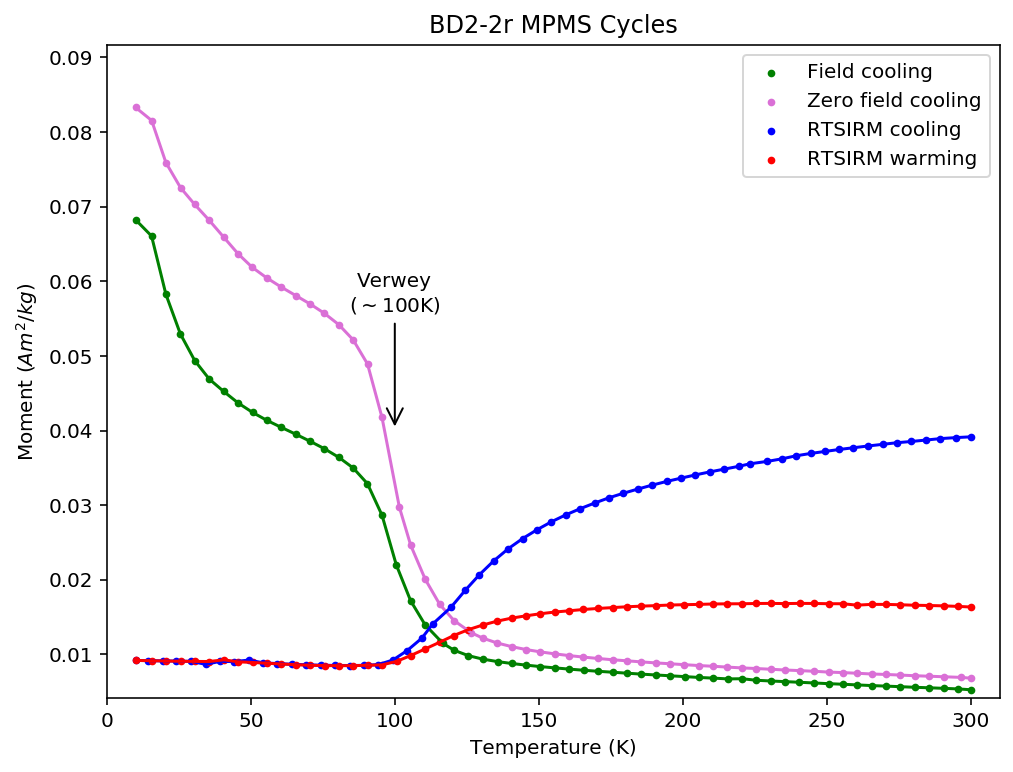

In [11]:
BD2_2r_MPMS_data = get_MPMS_data(MPMS_measurements, 113)
plot_MPMS_data(BD2_2r_MPMS_data, 'BD2-2r', True, annotate_text = 'Verwey\n($\sim$100K)', x_base = 100, y_base=0.04, y_base_scale = 1.4)

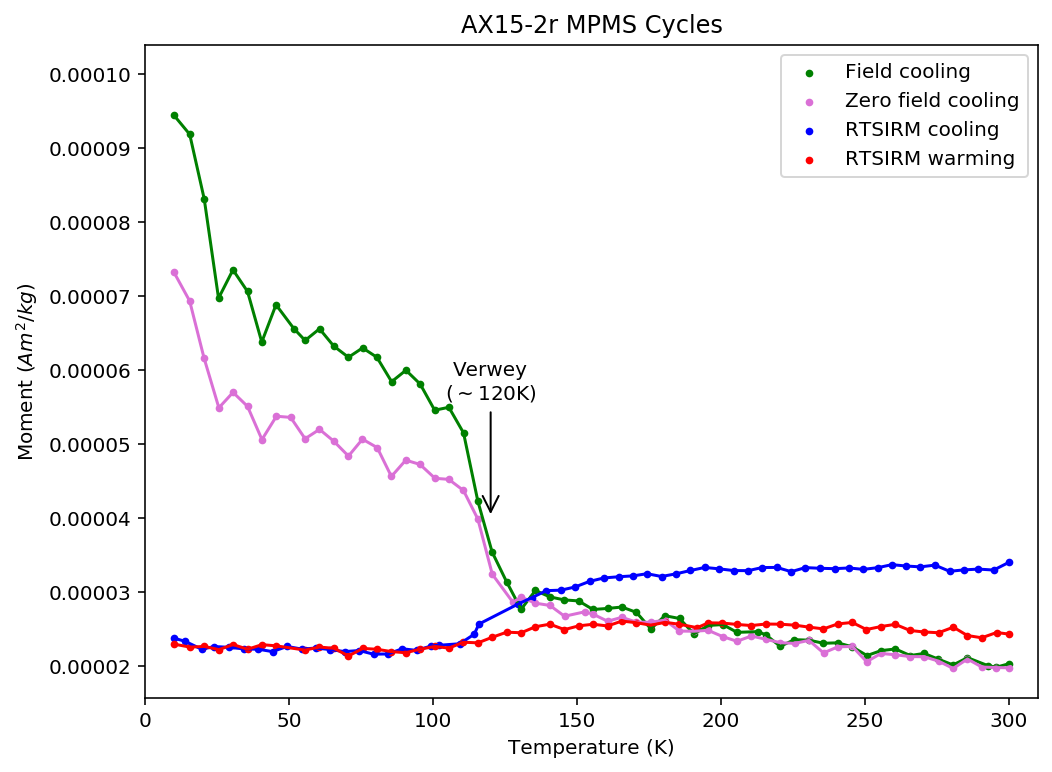

In [12]:
AX15_2r_MPMS_data = get_MPMS_data(MPMS_measurements, 0)
plot_MPMS_data(AX15_2r_MPMS_data, 'AX15-2r', True, annotate_text = 'Verwey\n($\sim$120K)', x_base = 120, y_base=0.00004, y_base_scale = 1.4)

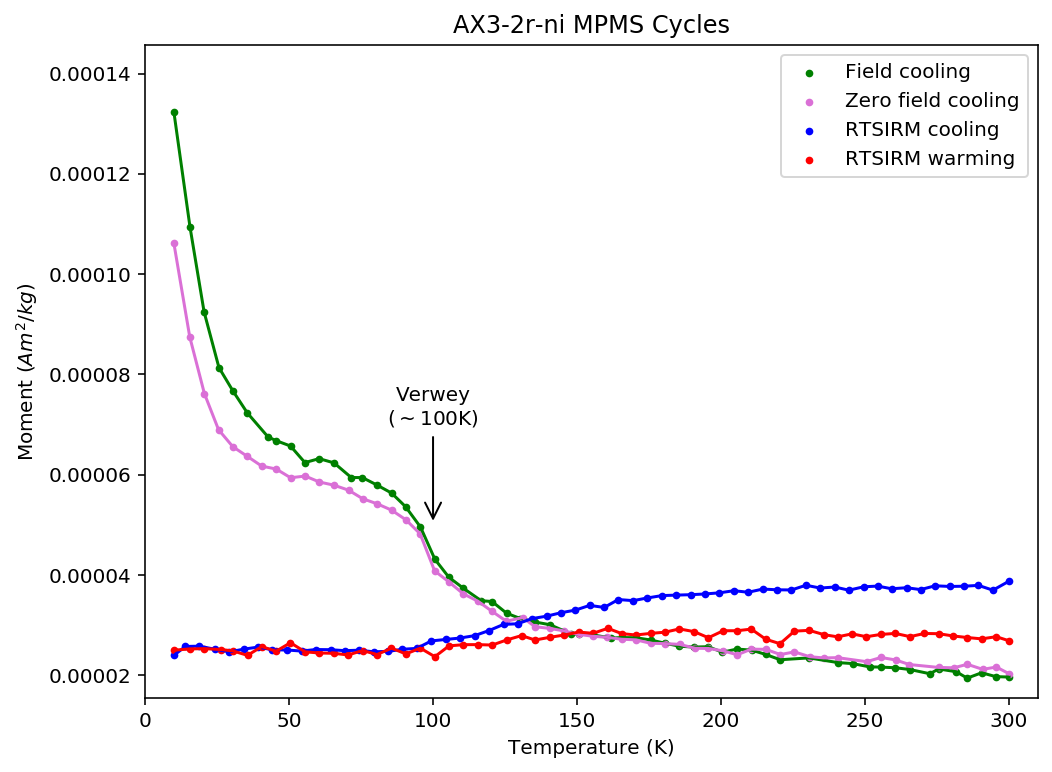

In [13]:
AX3_2r_ni_MPMS_data = get_MPMS_data(MPMS_measurements, 63)
plot_MPMS_data(AX3_2r_ni_MPMS_data, 'AX3-2r-ni', True, annotate_text = 'Verwey\n($\sim$100K)', x_base = 100, y_base=0.00005, y_base_scale = 1.4)

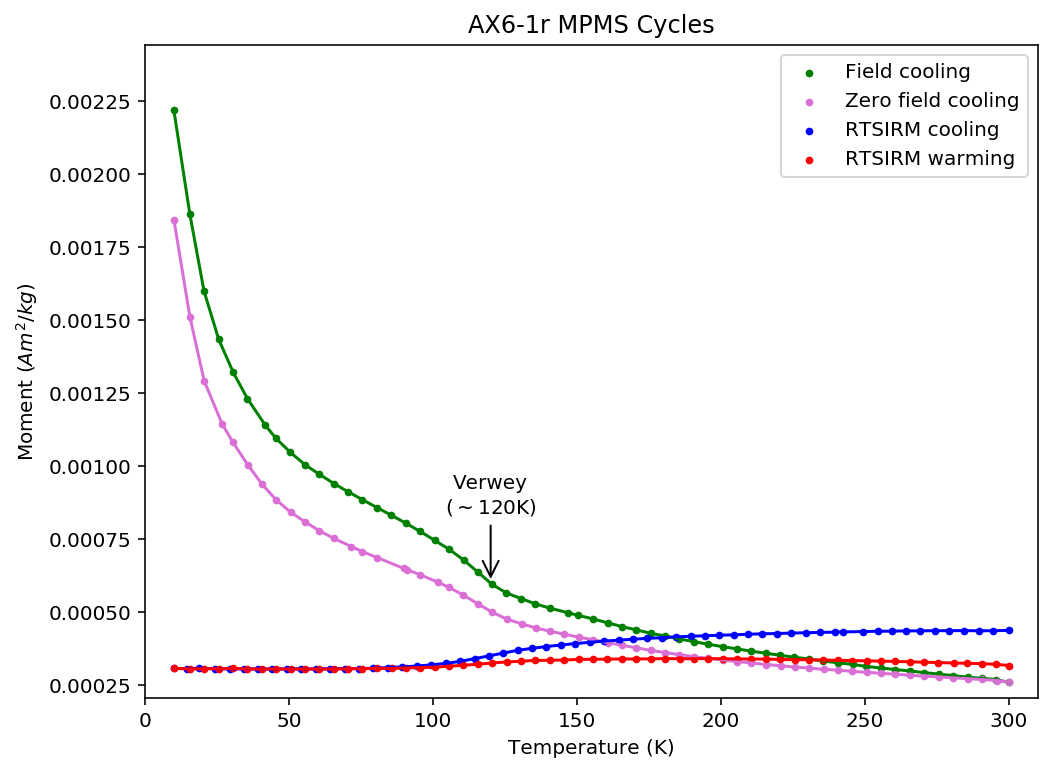

In [14]:
AX6_1r_MPMS_data = get_MPMS_data(MPMS_measurements, 88)
plot_MPMS_data(AX6_1r_MPMS_data, 'AX6-1r', True, annotate_text = 'Verwey\n($\sim$120K)', x_base = 120, y_base=0.0006, y_base_scale = 1.4)

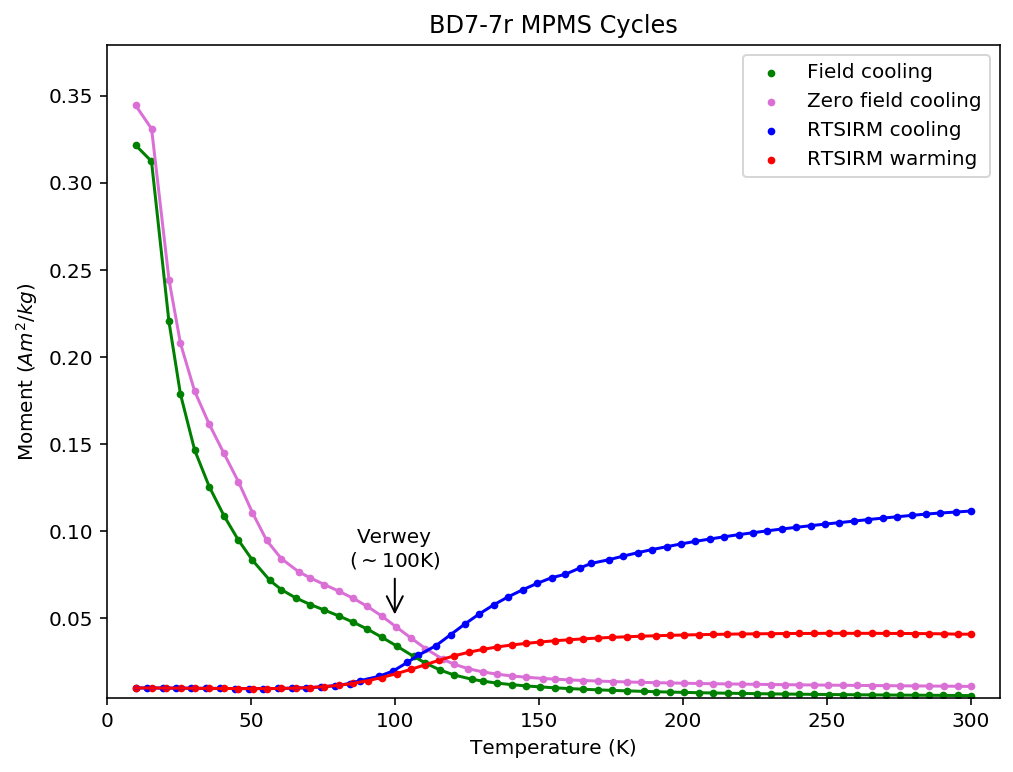

In [15]:
BD7_7r_MPMS_data = get_MPMS_data(MPMS_measurements, 138)
plot_MPMS_data(BD7_7r_MPMS_data, 'BD7-7r', True, annotate_text = 'Verwey\n($\sim$100K)', x_base = 100, y_base=0.05, y_base_scale = 1.6)